In [1]:
import numpy as np
import cv2
import array

def fft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=signal[x]*(np.exp((-2j)*np.pi*u*x/M))
        F.append(temp)
    return(F)

def dft(f):
    M=len(f)
    odd=[]
    even=[]
    G=[]
    H=[]
    if M==1:
        return(fft(f))
    else:
       for i in range(M):
        if i%2==0:
            even.append(f[i])
        else:
            odd.append(f[i])
       G=(fft(even)).copy()
       H=(fft(odd)).copy()
       F1=[]
       F2=[]
       for u in range(0,int(M/2)):
           temp1=G[u]+np.multiply(np.exp(-2j*np.pi*u/M),H[u])
           F1.append(temp1)
       for u in range(int(M/2),M):
           temp2=G[u-int(M/2)]-np.multiply(np.exp(-2j*np.pi*(u-int(M/2))/M),H[u-int(M/2)])
           F1.append(temp2)
#        print("fft function output:",F1)    
       return(F1)

a=[1,2,3,4,5,6,7,8,9,10]
print("inbuilt:",np.fft.fft(a))
print("calling fft:",dft(a))




inbuilt: [55.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-1.33226763e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]
calling fft: [(55+0j), (-5.000000000000001+15.388417685876266j), (-5.0000000000000036+6.881909602355863j), (-5.0000000000000036+3.632712640026802j), (-5.000000000000002+1.6245984811645284j), (-5+0j), (-5.000000000000001-1.6245984811645329j), (-4.999999999999998-3.632712640026806j), (-4.999999999999995-6.8819096023558695j), (-4.999999999999984-15.388417685876266j)]


In [6]:
import cv2
import numpy as np
import pandas as pd
img = cv2.imread("lenares.png",0)
def find_dft(img):
    row=[]
    col=[]
    result = np.array(img)
    for p in result:
        row.append(dft(p))
    result2 = np.array(row)
    
    for p in result2.T:
        col.append(dft(p))
    result3 = np.array(col)
    print("inbuilt dft2 : ",np.fft.fft2(result))
    return result3.T
print("user defined:  ",find_dft(img))

inbuilt dft2 :  [[1319702.            +0.j          -19344.42525843+82525.89106234j
    60483.58776986-42588.97054748j ...  -12072.25087017-19713.52496986j
    60483.58776986+42588.97054748j  -19344.42525843-82525.89106234j]
 [   2435.86518667-47817.40803532j  -65741.88032027+51810.40204489j
   -40092.69629329 +8595.0098645j  ...   23521.02473668+25419.23826323j
   -11795.03745458+20724.48706195j    3224.87387249+28532.73929314j]
 [ -13701.86777588-10619.87490491j  -10273.49633465 -4326.76081634j
    24417.19402533-13577.40740847j ...   13240.25898304+31712.88289026j
   -24478.1749259  -5366.84854063j   27295.6486436   -840.05320334j]
 ...
 [  18689.55959453 -8115.61955272j   27269.89529015+23853.97617467j
   -17484.71134566 -6946.27752685j ...   36724.26088283  -322.68694376j
     2386.90296846-27689.74585914j   -1820.03985942+24051.74871667j]
 [ -13701.86777588+10619.87490491j   27295.6486436   +840.05320334j
   -24478.1749259  +5366.84854063j ...  -22963.93731651-23957.98751897j
   

In [9]:
import math
import cmath 
dog = cv2.imread("dogres.jpg",0)
def magnitude(matrix):
    mag=[]
    mag2=[]
    li1=[]
    li2=[]
    for i in range(0,matrix.shape[0]):
        li1=[]
        li2=[]
        for j in range(0,matrix.shape[1]):
            li2.append(abs(matrix[i][j]))
            li1.append(((matrix[i][j].real)*(matrix[i][j].real) + (matrix[i][j].imag)*(matrix[i][j].imag))**0.5)
        mag.append(li1)
        mag2.append(li2)
    mag=np.array(mag)
    mag2=np.array(mag2)
    print(mag)
#     print("inbuilt mag : ",mag2)
    return mag
def phase(matrix):
    phase=[]
    li=[]
    for i in range(0,matrix.shape[0]):
        li=[]
        for j in range(0,matrix.shape[1]):
#             li.append(math.atan(float(matrix[i][j].imag)/float(matrix[i][j].real)))
            li.append((cmath.phase(matrix[i][j])))
        phase.append(li)
    phase=np.array(phase)
    print("phase is : ",phase)
    return phase
fft_lena = find_dft(img)
fft_dog = find_dft(dog)

lena_mag_dog_phase = magnitude(fft_lena)*(np.exp(1j*phase(fft_dog)))
print("combined matrix with magnitude of lena and phase of dog:\n\n", lena_mag_dog_phase)
dog_mag_lena_phase = magnitude(fft_dog)*(np.exp(1j*phase(fft_lena)))
print("combined matrix with magnitude of dog and phase of lena: \n\n", dog_mag_lena_phase)

inbuilt dft2 :  [[1319702.            +0.j          -19344.42525843+82525.89106234j
    60483.58776986-42588.97054748j ...  -12072.25087017-19713.52496986j
    60483.58776986+42588.97054748j  -19344.42525843-82525.89106234j]
 [   2435.86518667-47817.40803532j  -65741.88032027+51810.40204489j
   -40092.69629329 +8595.0098645j  ...   23521.02473668+25419.23826323j
   -11795.03745458+20724.48706195j    3224.87387249+28532.73929314j]
 [ -13701.86777588-10619.87490491j  -10273.49633465 -4326.76081634j
    24417.19402533-13577.40740847j ...   13240.25898304+31712.88289026j
   -24478.1749259  -5366.84854063j   27295.6486436   -840.05320334j]
 ...
 [  18689.55959453 -8115.61955272j   27269.89529015+23853.97617467j
   -17484.71134566 -6946.27752685j ...   36724.26088283  -322.68694376j
     2386.90296846-27689.74585914j   -1820.03985942+24051.74871667j]
 [ -13701.86777588+10619.87490491j   27295.6486436   +840.05320334j
   -24478.1749259  +5366.84854063j ...  -22963.93731651-23957.98751897j
   

In [5]:
#Finding the inverse of the dft image to get original image
# def original(img):
#     row=[]
#     col=[]
#     result = np.array(img)
#     for p in result.T:
#         col.append(fft(p))
#     result3 = np.array(col)
#     for p in result3:
#         row.append(fft(p))
#     result2 = np.array(row)
#     return result2
# #     print(result3.T)
# #     print("inbuilt fft2 : ",np.fft.fft2(result))
    

In [11]:
# IDFT
def idft(signal):
    F=[]
    M=len(signal)
    for u in range(0,M):
        temp=0
        for x in range(0,M):
            temp+=(signal[x]*(np.exp((2j)*np.pi*u*x/M)))
        F.append(temp)
    return(F)
img =  [(75+0j), (-28.500000000000025+33.774990747593094j), (-19.49999999999997-32.042939940024254j), (33-0j), (-19.49999999999997+32.042939940024254j), (-28.50000000000002-33.774990747593094j)]
def find_idft(img):
    idft_result = idft(img)
    idft_real=[]
    for item in idft_result:
        idft_real.append(item.real)
#     print("user defined idft: ",idft_real)
#     print()
    print("inbuilt",np.fft.ifft(img))
    return idft_real
# img =  [(75+0j), (-28.500000000000025+33.774990747593094j), (-19.49999999999997-32.042939940024254j), (33-0j), (-19.49999999999997+32.042939940024254j), (-28.50000000000002-33.774990747593094j)]
print("user def: ",find_idft(img))

inbuilt [ 2.+0.00000000e+00j  5.-4.44089210e-16j  7.-1.02558010e-15j
 10.-3.43504199e-17j 45.+1.02558010e-15j  6.+4.78439630e-16j]
user def:  [12.000000000000007, 30.0, 41.99999999999994, 60.0000000000002, 270.0, 35.99999999999994]


inbuilt [16619.84355824-1.96923793e-10j 17888.40581836-2.42876013e-10j
 18459.84607681-2.39779183e-10j 18579.75213783-3.63338586e-10j
 18862.80772385-3.19621773e-10j 18673.13842282-1.26833544e-10j
 17801.85694348-1.29351318e-10j 17239.03232959-6.14908154e-11j
 16997.77396428+4.37553105e-11j 16134.48139486-4.66254287e-11j
 15623.40240309-3.23117571e-11j 15049.61410359+1.03269127e-10j
 14319.42665455-1.27510875e-10j 13801.01834428-1.78636384e-10j
 13152.4006289 +1.75816996e-10j 13217.12565088+1.90375342e-10j
 13952.74302739+1.08191738e-10j 13924.18917552+2.78135248e-10j
 13511.31933734+4.31243825e-10j 14168.37873133+3.17654083e-10j
 14507.02494327+1.58247171e-10j 14845.89068843+1.05444445e-10j
 14599.07733159-7.93193662e-11j 14078.15945488-1.68099668e-10j
 13304.64916875-8.85854952e-11j 11674.05092355-1.10874261e-10j
 10183.45580995-1.44907205e-10j  9902.83236968-5.63065578e-12j
 11487.57284765+8.31592696e-11j 13796.19318057+1.82307226e-11j
 14092.08703499-1.09110715e-11j 13925.61120713-

inbuilt [ 2.99332033e+00+123.88582649j  1.56563977e+02+144.13018261j
 -3.67549144e+01+130.77200562j -7.99516209e+01 +83.83797262j
 -9.10074497e+01+277.07282916j -1.88011656e+02 -54.12891505j
 -4.13447641e+01 +24.2307276j   1.45348527e+02 +64.92787272j
  3.68722938e+02 +91.24863098j  1.00950474e+02 +47.44927181j
 -2.38979226e+01+121.91226788j -1.34703472e+02  -5.22707183j
 -8.12717134e+01+142.30026075j -9.85837876e+00+107.5741392j
  1.60091465e+01 +71.54325896j -1.05049142e+02 +37.70717836j
 -1.03365611e+02 +82.85495612j -5.84776171e+01+128.5708583j
  6.46546440e+01+397.04537685j  1.39736172e+02 +45.22827011j
  1.67551792e+02 -82.52748705j  1.25206894e+02+139.87629552j
 -2.96884268e+02+194.16187992j -2.99898555e+02  +4.91827053j
  9.86135285e+01-162.25444344j  1.76669948e+02-275.12977865j
  1.60046606e+02-226.38706584j -8.93307688e+01-124.87249683j
 -9.92895954e+01+131.55387283j  3.45880318e+01 +59.58707685j
 -1.14774030e+02+144.88852636j -1.41279208e+02  -9.09573621j
  1.46184695e+02-3

inbuilt [  81.80205603-201.10195924j  -83.91342934-178.79729672j
  -31.52998853 +52.13060356j   55.62677099 +27.28130002j
   85.49314549+109.09365011j -123.70817765+137.75532839j
   20.38582951-230.18313362j  232.27569733-100.32936382j
   53.72161362 +23.09670278j   21.00971422-111.00533044j
 -152.21907764 +16.25403224j  -61.39779553 +14.82613203j
  128.40460998+244.05821454j -127.29693887 +84.832041j
  -28.28394072  -6.10456712j   -9.74748157 +87.87738281j
  119.9721876  -20.58813019j  105.21271138 -28.49510197j
  206.64480361 -88.21048568j  -42.87279471 -86.44713092j
  -37.09488306 +83.06949771j  -75.83322704-113.31793545j
 -188.33250818 -18.44718422j  -45.46330885 -55.93584414j
   71.44600899  -0.4594419j    99.33281423-127.49787747j
   25.94584881 -92.66118181j  -46.89137552 -28.22292655j
  -40.28167409 +50.90743508j  -79.84906487 +97.03932272j
  -36.35254404 +91.45484732j    8.70111406 +99.21073863j
   -5.66991459-167.358279j     22.19595648-121.54090332j
  -66.93492648 +28.181011

inbuilt [ -14.30446485-207.8798519j    28.10932037 -10.47892631j
  186.36311104+110.9599429j    48.21327564 -84.61048291j
    6.71182741 -24.61806369j  -80.10401461 +75.82424597j
   57.51106295-121.1155786j     6.7215571  -24.86360142j
   -2.3186747   +5.29986719j -119.77072568 -50.37016152j
   10.11733678 -52.86135451j   -5.15248093 -34.01811203j
   39.41458642-107.97597172j  -49.40659473 -14.58109146j
  112.11223738+137.87532907j   22.93281225 -57.09886199j
    5.03220782 +22.1879302j   -16.48086705 +16.47987977j
    8.3209267   -8.05457414j  -93.58417576 -28.4161042j
   43.84177948 -50.09568173j   75.32609883 -91.43442566j
  -12.55647038  -4.24101353j    5.11133728  -7.65389577j
  -51.87973613 -65.22460798j   30.36259443 +55.5545817j
  -42.16087828 -32.89598956j   31.03654607-104.17205199j
 -141.99718488 +98.92240488j  -66.70327369 -54.09376185j
 -116.97377118 -33.06540801j   51.07759733 +55.00375506j
   14.82356887 -75.27193395j   46.67206182 -10.59364312j
  -19.99307592  +7.107797

inbuilt [ 130.35829408  -1.05135402j    1.3358427  +55.70835054j
    5.41689528 +15.51966524j   46.01835521 +58.61703901j
   14.82155057 +32.96050573j  -78.28756034 +84.93587394j
   32.1899037  -16.04059845j   25.47980113+125.32298953j
  -99.50336243 +52.31216497j   68.17346046 +41.96999139j
  -12.52707294 -21.33743832j  -27.59709008 -75.50182272j
  -15.53738074  -5.17512363j    4.96992859 +47.00986274j
  -77.88301316 +31.53216775j    3.69554439  +0.1889627j
  143.89169517 +87.67359952j  -20.66664926 +16.98938493j
  -69.97558043 -77.78430279j   70.28508834 +95.90763813j
   75.14958539 +73.25548941j   99.68017868+102.66130562j
    1.03667011 -94.59820386j  -41.89335913+100.15110445j
   55.59159203 -34.83393047j -117.46037728 +53.24852855j
  104.73166207 -24.92027579j    3.38327113 +81.89064742j
  -14.29227402 +50.28004565j    3.15441638 -25.89603815j
   -9.42598366+107.36759267j    8.41445518 -74.51529974j
  -25.41029369 +67.813613j     65.52719637 -13.90069894j
  115.81788514  -2.15288

inbuilt [ -22.24086185-166.37071263j   29.53579886  -9.5216174j
   -4.71955607 +90.57215097j    2.8988227   +4.72670025j
  -87.7997821  -12.02222585j   23.89275535 +11.38245846j
  -76.71695618 +57.20625789j   19.53250787 -64.11816615j
  -82.98941165-139.23084487j   92.42591609 -45.74480822j
  -73.68089803 -41.25429268j   -7.08836091 +81.1318836j
  -91.62881692 +48.43586636j   71.80723613 +39.97133328j
    6.09944659+113.5992296j    -4.36073339 -67.73385854j
  -61.7485452   +0.24282413j  -67.59968222 +77.00024387j
    9.29048206 +54.37584561j  111.041135  -134.51423708j
   16.91277244  -3.70255543j   38.72462631 -22.10707078j
   19.8406089 -103.36326327j  -78.85318797 +67.24895005j
   12.1332355   -4.95135877j    1.09510056 +11.46623574j
   97.71940333 +64.74218437j   49.81990065 +96.43371285j
  -17.38315699 -78.55795152j   10.28978954 +29.7927539j
   13.999625  -100.05383124j  -11.36396936 +30.57681956j
   -6.74422781 -31.70301059j    8.86174784 +32.79402535j
  -24.10464954  -2.9452175

inbuilt [  12.31561941+337.2125794j   -99.89735488 -97.36286001j
    8.67990497 -77.84843138j   58.12985904+110.84268249j
  219.99991923 -42.73560306j  -48.02662168-225.50106769j
 -164.80458061+233.19487294j   57.25653832+137.14237996j
   84.03005382 +94.29796894j   88.58456855 +54.65413187j
   24.51848826 +42.23840511j  -55.37919331 +18.6287621j
  135.39011187  -2.96685209j  112.47586131-150.13153544j
   40.41048977 -66.78073986j  118.24367387 +69.91889126j
  -24.67222153  -1.41539626j  139.26774216 -76.10689114j
  -32.60880135  +3.29767041j  -32.19837938+221.17292182j
  207.18018114 +89.45601574j   -2.79398695 -63.81350093j
 -101.52332272-116.15906194j -116.76063452 -65.28613964j
  -58.36609397-124.31996208j  177.24788425 -83.32737573j
 -134.96453466 +37.73634234j -113.97437948+124.29653644j
   48.77106328 +74.62422342j   63.92681189 -73.7081601j
   -0.74889522-261.01083864j  -66.12666351+157.23539048j
   68.96646507 +81.67261399j  134.66496272 -72.3629391j
 -206.43987769 -64.6450694

inbuilt [-256.12985802 +63.88699146j -147.69635775+215.67172482j
   92.84127159+269.72981333j   53.54341932+172.92153058j
  234.75157656 -82.4704977j   246.86641712-247.01702782j
 -263.13059656 -87.39941898j -324.58008535  +7.41244723j
  -72.39461452  -5.37758022j  161.14891469-207.22346743j
   11.87387661-103.97256075j  -13.69382721+103.55946206j
 -155.707411  +418.74275797j   58.08416356+237.25786518j
  175.82733463 +42.36244063j   72.25337056 -72.49962122j
 -168.20378846+124.60809816j   15.20876431-127.95975018j
   76.63206577-148.15043802j -336.98967841 -99.79518605j
 -242.29194711 +82.49585798j   73.80435314+502.4755646j
  402.05008271+317.33077714j  733.19113159  +6.70868061j
  789.59577714 +40.28812294j  561.43005061-249.60346197j
  396.69375498-486.30056813j   35.56878159-426.47377555j
   78.69301345-242.44222453j  339.13400333-240.83355196j
  350.9533619 -240.69596693j  178.71718245 -91.88527515j
  -75.76308249  +7.80384136j -221.44774931 -39.33805005j
 -139.96675887-205.32991

inbuilt [18241.85112589+0.00000000e+00j 17482.29494805-6.88351065e-11j
 18375.43632237-3.53566065e-11j 15301.00803644+5.63568392e-11j
 14866.75074589+1.07360342e-10j 18121.08704038+6.73633447e-11j
 14448.04869748+6.60463220e-11j 14526.61140551-9.87185262e-12j
 17123.28124499-1.64029850e-11j 16494.03775615+1.51812713e-11j
 18350.73930283-3.99933330e-11j 16771.04645111-1.86390451e-11j
 19096.60581577+7.98106407e-12j 19658.81848195-8.70551442e-12j
 18653.69999155-2.12304501e-11j 18170.45369115+5.48284042e-11j
 18804.90503907+5.28926242e-11j 19664.06830012+9.94122501e-13j
 18066.11891949-2.73643651e-11j 18136.23784155-4.01873007e-11j
 19316.1918387 -7.69227116e-11j 18420.03648938-7.57379355e-11j
 18631.553536  -1.18781929e-10j 18229.24728054-1.19656274e-10j
 19093.95869858-7.20268122e-11j 18599.4379855 -6.18551964e-11j
 18714.12413176-7.56805598e-11j 18397.53563183-5.78386323e-11j
 18989.17982123-3.28262680e-11j 17603.85818015+6.25018352e-11j
 19356.02896488+8.04279053e-11j 20056.27866017-

 13522.65531113+5.43918818e-11j 17826.21645068+6.35375779e-11j]
inbuilt [15857.34211812+0.00000000e+00j 16413.73529372-2.54658516e-13j
 15223.82183097-4.87261786e-11j 16156.47994358+1.20417099e-11j
 16489.41583355+5.71928049e-11j 12349.8410753 +1.02012876e-10j
 13640.32584591+4.94956807e-11j 13928.53423597-1.86508073e-11j
 14705.80655241+7.74697678e-12j 15767.56088116+8.58903402e-12j
 13830.10788159-1.25772365e-11j 15604.2339517 -3.82439152e-11j
 14798.12873039-8.54733212e-12j 15283.51712246-5.91734542e-11j
 16569.62572358-4.54523671e-11j 17084.42722449+8.25652687e-11j
 15545.19493607+8.96360198e-11j 16401.41341915-6.49253569e-11j
 15924.47909171-5.93371193e-11j 15706.8357471 +9.32680990e-12j
 15214.70619573-7.71569870e-12j 16161.70848568+1.20459427e-11j
 17717.29383145-6.70119887e-11j 17781.44163126-7.84329008e-11j
 18101.30842262-2.84165408e-11j 17617.8853499 -2.97940616e-13j
 17499.6890455 -8.51888561e-12j 17755.74159155+3.58485089e-11j
 18487.13272461+5.90892087e-12j 19293.676121  

inbuilt [16337.93727038+0.00000000e+00j 15045.56606429-6.89215085e-11j
 13182.56734422-6.16455509e-11j 12141.21496692+3.12047632e-11j
 16313.86448068+6.53502326e-11j 14866.02824611+2.01375046e-11j
  9867.53155091+7.18376927e-12j 14961.53308751-1.19774279e-10j
 13538.43772375-1.15693783e-10j 13275.43429272-4.54751956e-11j
 12859.70414577-2.52884068e-11j 13778.72351576-3.59266129e-11j
 14464.94947227-1.60738091e-11j 14308.87646641-5.44669255e-11j
 14713.01005706-7.23789822e-11j 13885.02412238+4.46805957e-11j
 14106.09743528+7.49847999e-11j 13060.38510616-1.23453868e-11j
 12935.98486782-2.50040175e-11j 14315.14891867+2.43545463e-11j
 14878.24588787+5.94226272e-11j 14184.10621522+7.65984947e-11j
 15006.51697968+1.02710195e-11j 13734.27666711+3.23815059e-11j
 13234.29625041+8.23219633e-11j 14057.54690337+1.80358421e-11j
 12802.25349427+7.78622944e-12j 13592.08163353+5.48238216e-11j
 14820.93733051+4.26366376e-11j 16858.26635717+4.30437912e-11j
 16787.84630626+1.32194079e-10j 17202.0540562 +

inbuilt [16459.94840022+0.00000000e+00j 15598.197805  -3.33466232e-11j
 16303.40662442-5.31235855e-11j 16674.71447335+2.17869456e-11j
 15240.25759456+6.97931033e-11j 14177.66884534+6.99154311e-11j
 12704.23339251+5.89613136e-11j 13759.82462295-2.61071132e-11j
 13431.57718549-4.11476253e-11j 13597.95824028+2.88745885e-11j
 13951.79607113+3.26566242e-11j 14021.43669525-6.67481821e-11j
 14897.2391142 -8.69268433e-12j 12786.85977302+5.25507754e-11j
 13824.37368138+3.19396960e-11j 14352.16328008+9.89625168e-11j
 15595.97249908+5.74633954e-11j 12712.86881347+1.75978458e-11j
 12535.55303397-7.89469187e-11j 12890.04648234-3.60023124e-11j
 11574.39027761+5.74059652e-11j 10926.0307174 +7.79988265e-11j
 12676.53831615-4.91747537e-11j 11586.76910566-7.75827677e-11j
 10673.1795301 +5.88303165e-12j 12158.6334913 +1.96518409e-11j
 13879.02408156+4.83790516e-11j 14623.21542843+1.40822297e-10j
 13728.21330152+1.30940311e-11j 12936.37260275+1.82468171e-11j
 11822.8086515 +8.04141506e-11j 12329.09267622+

inbuilt [21750.70950763+0.00000000e+00j 19847.09088236-3.44675755e-11j
 17317.86042447+1.33150024e-11j 16563.21774493+4.58908289e-11j
 17269.26508312-1.13424706e-11j 15963.0019247 -2.61925326e-12j
 14124.26476102+1.38862519e-11j 13957.61004286-4.07157070e-11j
 14494.92967521-2.12935125e-13j 15608.0242511 +5.54635310e-11j
 14216.29065526+3.83140861e-11j 16294.58322601-2.57824310e-11j
 14093.61394179-2.22697739e-11j 12470.45877678-7.28066951e-11j
 10613.39063112-4.55966311e-11j 10809.55343399+6.26576277e-11j
  9698.08746648+8.05368275e-11j  9338.99473594+1.30229727e-11j
 10750.46696492-4.06915683e-11j 10384.59205886-4.39261515e-11j
 10822.39212035-3.33509818e-11j 11162.87145257-4.96155203e-11j
 11370.27628385-8.00521353e-11j 12336.14768047-5.88044444e-11j
 13430.10186794-5.08218407e-11j 14017.81321364-5.14909746e-11j
 14502.25334637-2.61023688e-11j 13385.08817112-6.13520242e-11j
 12895.83907428-6.05772404e-11j 12878.74346145+1.34501200e-12j
  9860.7057071 +1.42866673e-10j  7057.92618555+

inbuilt [15005.88877656+0.00000000e+00j 15978.00699569-1.96587280e-11j
 16669.74546954-3.63922936e-11j 14786.00362958+4.01087163e-12j
 15246.44605199-2.86136861e-11j 13735.73143635-2.67766860e-11j
 14506.27925807-2.61799931e-11j 12678.43395352-1.22689282e-10j
 15154.91753498-1.24917919e-10j 15427.31958728-6.59899101e-11j
 14950.58613916-3.27570826e-11j 15447.16592593-9.07680038e-11j
 17382.40205822-5.02871406e-11j 17531.96731916-1.14543377e-11j
 18106.84983378+3.63552920e-11j 19549.14205632+9.91078417e-11j
 20921.61518069+1.21891463e-10j 17826.80315663+8.90134156e-12j
 16232.38887556-5.01289072e-11j 17571.99458148-2.25749829e-11j
 17745.60969206+8.15652837e-11j 18122.68696775+8.35031478e-11j
 16242.16197175-3.45427888e-11j 14802.11566258-1.88323603e-11j
 15647.92262567+8.77554683e-11j 17454.49583489+7.80864787e-11j
 17436.27357373+8.35343872e-11j 16466.360714  +1.03909730e-10j
 15971.02450083+6.95014633e-11j 15152.47220127+1.82379455e-11j
 13141.53218763+1.15194119e-10j 12085.66621134+

inbuilt [14274.73735416+0.00000000e+00j 12945.2722191 +4.42514647e-11j
 14261.44248907-1.24418875e-11j 11121.34662027+3.79668563e-11j
 16014.11681844+4.97690617e-11j 20426.66447117+7.76121627e-12j
 16963.97554903+4.07641021e-11j 17240.31990541-4.09357744e-11j
 16767.96815386-2.76161938e-11j 16317.75889285+3.47429756e-11j
 15701.39060118+6.69712646e-12j 15599.1215047 -1.08140907e-10j
 16385.12656079-5.04912112e-11j 16890.50924727-2.77268462e-11j
 15043.19953699+4.81963893e-12j 15095.81196621+1.05329864e-10j
 16210.01811383+1.21288702e-10j 14629.11831348+1.02519485e-11j
 14447.1047938 -2.18309849e-11j 14825.07201898-6.20456061e-11j
 14389.74371319-6.69316849e-11j 13862.60277689+1.94435234e-11j
 13461.47361415-3.75280519e-11j 15063.71597959-3.63339052e-11j
 14237.15775314-6.75359197e-11j 14345.51648915-1.00940143e-10j
 13610.14611522-1.00686089e-10j 11619.63686886-9.96664077e-11j
 10038.77100322-1.40109143e-10j 11859.77585319-8.95181780e-11j
 12545.91450925+2.19289667e-11j 12829.95541158-

inbuilt [16170.68850031+0.00000000e+00j 14940.7561618 -8.39827408e-11j
 14876.76144126-5.94081939e-11j 14374.9816735 -3.77258402e-11j
 14347.79533706-8.36554862e-11j 12013.88736786-9.13582138e-11j
 11588.78990681-1.25276514e-11j 13079.36718002+1.34181817e-11j
 13765.8201834 +2.16049573e-12j 14330.02728097+1.66009369e-11j
 10880.40704897+4.35138197e-11j 12129.54469363-1.12334625e-10j
 13112.88258455-7.99041028e-11j 12491.68645889-2.80983242e-11j
 14770.24919692+8.43485623e-11j 15943.7256413 +8.97042296e-11j
 16824.08763802+7.59429711e-11j 16934.22867018-2.19452619e-11j
 15057.70838939-5.48351431e-11j 13743.91168393-3.92456642e-11j
 10881.08576927+7.59597659e-12j 10841.63889441+2.48706478e-11j
 12274.81886107-4.03432229e-11j 12020.49132755-6.28542392e-11j
 11149.55145573-1.59325643e-11j 11745.45620802-1.69193896e-11j
 11395.51767999+6.04530834e-11j  8345.99909151+1.21446989e-10j
  8777.55737088+1.15405615e-10j  9099.73922764+1.17291441e-10j
  8744.12500497+1.92573974e-10j  7271.53903597+

inbuilt [15931.37218847+0.00000000e+00j 12545.59739765+1.23964128e-11j
 11861.85532582+9.24501364e-12j 14492.65894312+1.24146027e-11j
 14058.95892711-2.57181065e-11j 13721.74655948-7.50892495e-11j
 15229.68325244-9.74873591e-11j 13916.53215444-7.06452237e-11j
 11777.67037517+1.81849012e-11j 11101.44649203+9.13209683e-11j
 10670.19616102+1.80369624e-11j 11274.24477059-7.53425123e-11j
 12819.35018065-1.01677054e-11j 13497.95572686-6.15191034e-11j
 14053.87855598-6.18614667e-11j 12775.50231522+2.29194606e-12j
 15406.66437246-5.53213150e-12j 16123.64829914-7.51842836e-11j
 17211.04487018-1.68284681e-10j 16758.17709718-9.93030045e-11j
 15870.81958168-5.85404318e-11j 17696.08847542-5.69464964e-11j
 19506.66422126-1.02833258e-10j 20431.41989542-1.49736332e-10j
 20299.49932794-1.22786356e-10j 22249.15433519-1.50709118e-10j
 20857.11834758-1.38709348e-10j 19910.79603203-3.98144076e-11j
 16998.75708359-1.02821118e-10j 15115.79355017+1.04880431e-11j
 17101.61945803+9.85084853e-11j 17427.70371581+

inbuilt [22276.39024277+0.00000000e+00j 19123.03330933+2.14447482e-11j
 19163.28743305+6.30097929e-11j 19995.88324546+2.80135737e-11j
 19784.67567045+3.39831670e-11j 21087.5597612 +4.03459669e-11j
 20403.4177581 +2.45614134e-11j 22003.5696481 -5.15389747e-11j
 22640.7485718 -4.23988064e-11j 18487.62735571+5.24228015e-11j
 14961.02462113+2.12414658e-11j 12613.38380392-5.83002171e-11j
 15209.9977601 +2.60642816e-11j 18702.98251604-2.65647358e-11j
 18128.04649814+4.03555328e-11j 17344.45276725+9.40912270e-11j
 17032.74878682+8.81801614e-11j 15995.05011005+4.34855758e-11j
 15281.41254409-7.26884162e-12j 15766.7775671 -2.37741275e-11j
 13959.93961479-2.16017061e-11j 12986.36950003+3.88383960e-11j
 13298.37028824+2.13156501e-11j 12546.98887278-1.17964321e-11j
  8197.99595757-4.01005765e-12j  8319.49214504-5.90752239e-11j
 10289.75354289-3.61156303e-11j 11862.56652571-2.09248493e-11j
 13440.69832352-7.55959982e-11j 11992.0909231 -1.69645324e-11j
 14051.90313034+6.15100940e-11j 13623.08474002-

inbuilt [15344.05180846+0.00000000e+00j 14976.85200094+4.37103154e-11j
 12330.48588098+2.78305379e-11j 14064.51074385+3.68709152e-11j
 14444.24826868-1.45074493e-11j 14014.01160238-3.85928366e-11j
  9092.41624084+6.32220517e-11j  7522.54283567+1.91790320e-11j
  8466.38018492+3.81738311e-11j 10968.00609406+1.26678652e-10j
 12060.24478246+1.84722343e-10j 10634.04138208+6.97585579e-11j
 10309.40466061+1.25244177e-10j 12506.63544899+6.74536299e-11j
 15211.54540739+1.07025520e-10j 15282.92110516+1.38739025e-10j
 13824.70360542+1.13569612e-10j 12863.57057154+5.26620814e-11j
 14740.06480683+1.22840455e-11j 16590.51635119+1.46264165e-11j
 16721.16138606-6.99533115e-13j 15386.7742968 +9.22258591e-12j
 15176.51416544-4.67843085e-12j 16049.60222207+1.03766767e-11j
 14424.89642592+3.07140393e-11j 14651.8225257 +5.15178722e-11j
 16399.23962736+1.01548846e-10j 11163.46336638+1.26674673e-10j
  6599.24378758-3.07005790e-11j  8849.57457689+4.55363486e-11j
  9730.87439634+1.70476700e-10j 10736.42386772+

inbuilt [15048.08677407+0.00000000e+00j 13033.12502063+1.08157110e-10j
 13091.06245734+1.13432179e-10j 12771.74520093+7.66885933e-11j
 10436.12233502+5.71798174e-11j  8875.96211756+6.72515711e-11j
 11432.92729908-3.67446555e-11j 11707.22939833-6.25068811e-11j
  7972.46751538+3.25759999e-11j 11464.30878764+2.02088599e-11j
 12212.39262284-3.62889113e-11j 11808.19748701-6.52773233e-11j
 13885.85921118-1.24215973e-11j 15298.87855004-7.98938040e-11j
 14676.80336884+2.14187389e-12j 12091.96034331+8.33933875e-11j
  9479.24607899+1.16661000e-10j 10636.39538536+1.58255767e-11j
 11601.04210131-5.83656941e-11j 12113.70705608-1.45080601e-11j
 12124.85188259+3.46827477e-12j 11807.93620688-8.66992017e-12j
 11716.03564324-2.68092154e-11j 11904.64891858-6.95831548e-11j
 10388.37453416-5.60269665e-11j 10155.75629763-1.18285615e-10j
 11228.61338089-8.84213958e-11j  8792.80386   -8.19084851e-11j
  8827.75150292-1.19365388e-10j 10402.44525989-6.41506583e-11j
 10517.40536862-3.21353633e-11j  9754.16580723-

inbuilt [10408.07305984+0.00000000e+00j 10111.70926205-2.81761459e-11j
 11138.4773841 +8.68567440e-12j 12483.46746693+3.99359124e-11j
 10838.39309497+1.29274220e-10j 10212.06601158+1.71083250e-10j
 11451.61631167+7.47725509e-11j  8771.05063526-4.48351891e-12j
  7017.22847518-2.31467924e-11j  5960.51377259+9.92608861e-12j
  7247.04375014-8.72305567e-12j  5454.33868671+3.74718100e-11j
  3302.56487721+1.42181459e-10j  6696.02435132+6.30490775e-11j
 10868.09171692+2.19922485e-11j 12667.6407834 +8.10438787e-11j
 13407.26584389+1.15670893e-10j 14717.16813885+3.85761578e-11j
 13458.77256749+1.04474375e-11j 12166.1072106 +1.52161223e-11j
 12851.5846609 -2.09732429e-11j 12551.62648734+7.07912394e-11j
 13132.03730945+1.12622193e-10j 15537.60558513+8.35018699e-11j
 16884.86790031+8.54862566e-11j 17502.28165188+5.93122739e-11j
 17695.37357033+3.28678562e-11j 17906.21716473+9.73995711e-11j
 17144.44278413+8.90370935e-11j 17748.23663006+1.71301715e-10j
 17706.07767873+2.44495987e-10j 17558.66860894+

inbuilt [10061.28525537+0.00000000e+00j  7709.47337012+2.56295607e-11j
  8634.27005059+6.01721695e-11j  9262.18042674-3.05499270e-11j
  7379.10762948-3.84627262e-11j  7880.78445994+6.86190759e-11j
  7637.21517712+5.70749376e-11j  6705.76640736-1.02571579e-11j
  6697.69564995-6.30856702e-11j  5351.4627232 +5.19898617e-11j
  3528.90628501+3.80076778e-11j  8373.8534841 -2.85440138e-11j
  8342.52827328-7.91411112e-11j  7090.73353285-1.54134420e-10j
  6407.85778937-1.49869810e-10j  7233.61108949-7.15718103e-11j
  6330.13881052-2.83305647e-11j  7749.30095943-2.11078645e-11j
  8940.28830182-7.07958342e-11j 10644.67365758-6.70512444e-11j
  8508.60941424-6.99730418e-11j  8645.95878573-4.62863442e-11j
 12559.78491372-1.78814427e-10j 13999.74282997-2.81064819e-10j
 14104.34607718-2.66180703e-10j 14034.4155458 -2.24755867e-10j
 13451.44781602-2.12583933e-10j 14403.86170135-1.81284574e-10j
 13191.82710396-1.20341728e-10j 11576.06318754+1.74660304e-12j
 10452.3983339 +6.54540225e-11j  9333.58504184-

inbuilt [12230.29130843+0.00000000e+00j  9653.82385241+3.55430529e-11j
 11225.93893407+6.82484824e-11j 14371.11868854+2.94858182e-11j
 12191.07938039+9.37296331e-11j 15223.82069623-5.47353310e-11j
 15809.86599124-3.89636678e-11j 14684.63797044-5.62748086e-12j
 13694.65530437+1.46683231e-11j 13007.2201517 +2.67367741e-11j
 12008.3210385 +5.52729115e-11j 14320.74458354-2.90236356e-11j
 14970.37452757-7.69869000e-11j 13541.83787038-4.30321873e-11j
 13202.40048247+7.41686545e-11j 13959.76937631+1.05716195e-10j
 14577.01984502+1.38518934e-10j 15993.02515599+5.15311777e-11j
 12148.63547949-7.24094309e-12j 12029.40293015+4.42224695e-11j
 11346.59130692+8.63599550e-11j  9914.4689838 +6.93650980e-11j
 10102.90561034+3.26711516e-11j  9903.08044187+7.37697971e-11j
 10099.7822056 +1.21373249e-10j  9246.55292754+1.15506808e-10j
  9431.67574496+1.55692210e-10j 12107.98038021+2.30239693e-10j
 12526.88334002+1.30604498e-10j 13850.91658846+4.23805249e-11j
 12999.25908505+4.77505898e-11j 13652.94590588-

inbuilt [16925.71486787+0.00000000e+00j 16893.84714364-1.71894499e-12j
 18448.54665322+1.63199729e-10j 18192.01902273+2.20106813e-10j
 19074.81746763+1.36013355e-10j 17563.23759778+1.54934924e-10j
 18002.42705091+2.08119295e-10j 17274.21817316+2.76769724e-11j
 14497.76799187-1.02317887e-10j 13752.11591812+3.35631499e-11j
 13344.26772591+4.87241324e-11j 15640.96539609+4.07979695e-11j
 17048.60935417+3.66159894e-11j 17523.01615204+2.31369866e-11j
 17698.6206405 +1.25779853e-10j 17656.48663451+1.44799924e-10j
 19281.29504708+1.62009869e-10j 18213.19388718+4.26596580e-11j
 17336.44587418-2.65015352e-11j 16531.56095004-1.24220558e-11j
 16208.50534349-6.23860672e-11j 13260.32049979-1.46331748e-10j
 12532.02873366-3.34854639e-10j 11055.057318  -3.86767097e-10j
  9702.26582098-4.25498419e-10j 10878.76663938-4.41617932e-10j
 11266.90475109-4.71576133e-10j 11859.55610908-3.85930122e-10j
 10392.56306785-3.98071617e-10j  9994.03477976-3.45970297e-10j
 10240.49398911-2.45489913e-10j 11616.56036579-

inbuilt [15362.16704383+0.00000000e+00j 15854.99572115+8.38554115e-12j
 16118.50858101+1.70530257e-11j 16672.98625062+1.35933078e-10j
 15114.40528516+1.93229848e-10j 10354.27700757+7.34948636e-11j
 13156.56288807+6.97061871e-11j 11596.13461329+7.79159426e-11j
  9873.43597236+2.01520940e-11j 12590.51831388+1.06834219e-10j
 16054.01789369+2.56071071e-10j 16324.30555282+1.69876296e-10j
 16544.85857938+1.23111511e-10j 16510.79128571-2.32947043e-12j
 16700.23684051+5.33361573e-11j 17883.99330268+1.57821158e-10j
 17268.28915832+1.61946023e-10j 16478.99188496+8.21033318e-12j
 16307.21105512+6.44867330e-12j 17948.47054022+1.06159273e-10j
 17604.02650415+1.46213040e-10j 17755.54728109+1.06098759e-10j
 18132.6711093 +5.26318662e-11j 17132.5525585 +6.92066825e-11j
 14169.92632353+8.92666532e-11j 14032.10922944+1.08600328e-10j
 14771.82148835+5.72486682e-11j 14719.64495688+9.66230787e-11j
 14580.31658108+1.05589080e-10j 14392.4605698 +1.13699028e-10j
 15187.67406899+1.82414453e-10j 16274.78230655+

inbuilt [ 7723.27631141+0.00000000e+00j  9755.14768932-9.01127351e-11j
  6176.14530332+6.22821972e-11j  9573.30054508+8.06903699e-11j
  9626.7627244 +7.23688634e-11j 13632.87627012-2.88013354e-12j
 13680.45957926+1.50117775e-11j 12224.30788522+6.13251303e-11j
 12676.43337091+4.83667834e-11j 10409.04711194+1.49015354e-10j
 11180.54160856+6.54229740e-11j  9207.81080694-3.39920679e-11j
  5612.83777615+1.31150585e-11j  7392.80253663+8.80404100e-11j
  6088.02810786+1.90806826e-10j  7692.02330458+2.21409672e-10j
 11502.27472028+1.44672952e-10j 12779.01580456+4.22112040e-12j
 13208.97985206-5.74375634e-11j 12553.93112932+4.08585687e-11j
 13536.9909226 +7.85917851e-11j 13462.49971069+7.34911100e-11j
 12791.1074796 -1.33414594e-13j 12575.89150115-1.97002995e-11j
 13281.56201128+1.72082145e-11j 12765.6876401 +1.17754380e-11j
 11794.43334847+8.40510475e-11j 13211.8936953 +1.55924922e-10j
 13803.07335431+1.87007751e-10j 14665.98034087+1.08383588e-10j
 13643.56091018+5.40028819e-11j 15933.92680112-

inbuilt [ 208.59134809 +92.44988294j  167.93949506 -13.85293405j
  341.53169655 +40.890392j    465.51603118  +7.5990762j
  411.7186432 -162.29728617j  366.13411019 +55.59748295j
  274.97661316 +24.95640184j  128.83650909 +58.36674975j
 -126.91054439+266.79216433j   24.67873711+147.53655957j
 -130.77235481 -68.27467061j -240.09467917-227.21625628j
  -11.30694222 +30.23262984j  119.17942819 +66.80822999j
   68.71252779 +52.69109553j  319.70411005+141.13047721j
  318.51090119 -17.40258631j  204.46726567 -70.08680196j
  107.58770053-157.11485994j  236.38302844  -7.33348031j
  191.5437481 +117.88797914j  -50.59039167+380.69302043j
  -35.09314964+240.08978662j -393.07071828+315.6203369j
  -81.62889374+339.96649486j -163.20729654 +87.04302971j
 -306.1265816 +188.77533847j -566.14696251 -54.29328604j
  -57.94327692-284.83090047j -172.83187304 -63.44486886j
 -265.93115792-171.28177241j -282.3541173 -346.55393727j
 -356.97993483-250.03950927j -646.60918569-616.64691508j
 -367.92298627-854.611000

inbuilt [ 258.71997696-180.31751936j  228.24553828-142.35119774j
  159.09660266-178.77944522j  115.34207102 -59.49447609j
  -98.69155735  -7.25581354j -105.80361457 -42.78122055j
 -167.99130284-100.28376792j -153.22753971-191.01990336j
 -292.09002033 -38.59155626j    7.01247518-120.84287439j
   61.69854574 +16.64581021j   82.05945908  -4.88333429j
  -68.3122662 +104.30073205j   81.27778955  +1.13675329j
  165.63189953 -72.35310032j  204.53148755-101.42823046j
   -4.22442299 +31.5508836j   -48.69990899-163.99423585j
  150.77747186-119.72628313j   56.35920416-247.76915368j
  206.1688135  -74.24549013j   93.23427249 -86.47615343j
  216.74267952-217.22716528j  195.43023356 +15.3785017j
   78.32914546+174.70797873j   58.24821144+198.98946795j
  132.16781181 -96.70891769j  276.10057651-145.79632425j
  425.06504128-393.41868201j  193.15997238-200.65140054j
  -69.65720439-251.73991319j -299.308034   -30.29297956j
   -8.42567892-153.24400006j  106.74819711+209.99601841j
  -97.9871269 +259.23415

inbuilt [ 2.34698297e+02-6.15744860e+01j  1.47036675e+02+5.38355561e+01j
  4.58991375e+01-1.71949356e+02j -1.21364998e+02-2.02599758e+02j
 -4.04673982e+01-9.11164178e+01j -1.48413456e+01-1.35919351e+02j
  1.44969333e+01-2.30071236e+01j -4.87524316e+01+6.84931626e+01j
 -2.13435023e+01+4.70119048e+00j -1.14483020e+02-4.51974281e+00j
 -1.01000894e+02-1.08433307e+02j  1.10351432e+02-6.14923178e+01j
  7.06575251e+01+7.00585060e+01j -1.68429678e+00+3.49995266e+01j
  2.49109458e+02-9.40642478e+01j  2.36393699e+02-2.01979908e+02j
  1.27524375e+02-7.21878971e+01j  1.88529736e+02+7.84146869e+01j
 -6.06410622e+01+1.14570913e+02j  2.07093469e+01+2.26942744e+02j
  7.28546022e+01+9.40537154e+01j  2.65589836e+01-8.35214991e+01j
 -5.36094042e+01-2.32575358e+01j -7.61278644e+01+8.32939321e+01j
  2.03480907e+02+1.36034558e+02j -1.21743859e+02+1.33390603e+02j
 -2.05666023e+02+1.39014426e+02j  1.85537521e+01+6.31928578e+01j
  5.77706735e+01+1.39195207e+02j -8.23754042e+01-2.55484783e+01j
 -9.33188129e+01-

inbuilt [  -2.66546928-1.06964440e+01j  -11.39798635+4.08528031e+01j
   65.5736586 +1.43031764e+01j  -71.64334789-1.49574451e+02j
  -14.26011435-4.20215201e+01j  -36.06261732+2.56863477e+01j
 -116.21295029-5.75278039e+01j  115.30669395-9.30726938e+00j
   95.38893723+5.21066200e+01j   22.54675562+1.06445813e+02j
    2.41894057+4.82769064e+01j   41.7375118 -2.41044930e+01j
  -10.40450413+5.90421705e+01j  -18.31599868+8.34982419e+01j
  150.61394709-1.03046877e+02j   54.43058089-1.54180238e+02j
  -18.74962408+1.05453797e+02j  -19.95432939-5.58954648e+01j
  168.82114442-1.00868912e+02j   55.45816019-2.38151287e+02j
  177.96973299-2.17420614e+02j  255.86328652+8.70584190e+01j
  253.06879226+5.29084465e+01j  230.98848483-1.61007314e+02j
   41.08374693+2.45913425e+01j  182.62799229-3.74075698e+01j
   93.46124049+1.08346846e+00j  -30.83057062+8.64847249e+01j
  242.52990281-4.13027091e+01j  190.97577358-1.47804159e+02j
   97.8454514 +3.57297022e+01j  166.73485486+1.65272351e+02j
   50.91474941-2

inbuilt [  98.82195823+8.72056739e+01j   46.07466214+1.03546005e+02j
  110.26127994+7.63524323e+01j  -36.9177478 -1.34810557e+01j
   39.57091163+6.11058377e+01j  -36.50964121+1.34392421e+02j
   -5.61757583+4.97859136e+01j   65.34706909-6.23842399e+01j
   82.06440778-1.64890335e+02j  -39.71959582-8.96319476e+01j
 -185.82824956+1.22057225e+02j  -92.34353552+6.95419936e+01j
   34.13880473+1.30907751e+02j   42.12803959+5.27662678e+01j
  -37.16489325-1.77991946e+01j  -37.88177742+1.00891825e+02j
  -30.65218454-4.18559529e+01j   -1.02554991+6.87016824e+01j
  -96.38498412+8.85095094e+01j   96.55038431-3.04898537e+01j
  183.05276988+1.26735980e+02j  254.40813034-5.94065544e+01j
  -25.15737537-1.63799233e+02j  -29.16515294+5.07301248e+01j
  -28.75953915-7.06045745e+01j -145.9306562 +2.50272208e+02j
  -79.16846711+4.62884757e+01j   17.36242031+7.65901655e+01j
  388.90622707-9.10444658e+01j  170.02229143+1.01087359e+02j
 -160.30020096-2.89583302e+01j  219.19248291+9.15948380e+01j
   10.79926615-8

inbuilt [ 280.43078446+281.36730869j  367.43643541+110.05930117j
  334.88949465+102.64177186j  119.11765284+134.52747819j
   82.03610722 -76.65938702j  -36.11300702-184.38206692j
 -191.36340233-149.92497666j -265.16843916-130.84009577j
 -111.41270401 -35.49222655j  -33.463308   -74.43061071j
  -94.85049072 +16.70910739j -124.44594327 -69.99097774j
   41.21437258 +73.4449679j   319.50672933+130.29675826j
  233.8961312  +87.01194315j  332.56093014+104.01383362j
  119.69377049+234.48544914j  220.74656363+212.45394675j
  345.48291781 -13.39902835j  320.33282295 -70.76428453j
  -80.33601973 -27.47018889j -155.67105606+199.30078115j
 -151.42680984+160.34609152j   12.02902443 +93.34361871j
  195.04241495 -21.44951759j -110.20370711 +30.95552531j
    2.88521556 +80.0476841j   265.31603688+188.25897822j
  195.42770628 +19.50065581j -169.15766503-198.02927532j
  -25.37721172-330.08872519j  -60.93532027-170.60726786j
 -347.16303249+163.75024393j -105.30578741-240.8524572j
  108.90957536 +22.69604

inbuilt [  79.1506626 -1.71494542e+01j  346.03913096+8.76780146e+01j
  521.57587856-1.02891637e+02j  328.52782569-1.92198010e+02j
  138.83072674-7.17200990e+00j   69.80622481-2.73647751e+01j
  149.50537845-4.35859767e+01j  123.1429431 +2.92292127e+01j
   98.64253131+7.70359404e+00j -112.82866154+1.05342597e+02j
   23.11512782-2.56216634e+01j   89.25529834-1.83612486e+01j
  274.95569037+1.54995943e+02j  303.036822  +1.88393087e+02j
   85.7387794 +6.71620183e+01j  353.0247525 +2.00039306e+02j
  449.9002307 +8.57645769e+01j  178.91664245+2.40656973e+01j
  192.4210964 -1.13807707e+02j -158.46145187-3.58748982e+02j
   -2.91255735-1.91359655e+00j -118.27814162+2.06726488e+02j
  -96.37091914+8.01441585e+01j  -31.79947447+6.50062162e+01j
  -38.93671363+3.72326301e+01j   24.23981143+6.47237606e+01j
  191.12765157+4.53113518e+02j  101.71566536+1.23179723e+02j
  151.08738471+1.32540345e+02j  302.52567954-2.29174093e+01j
  282.70969924-1.97770609e+02j  414.95496062-1.16096352e+02j
   80.97393695-1

inbuilt [  628.6448205  +989.50347603j   399.16547354+1343.10674169j
    54.03347897+1303.41105315j   222.47934395 +951.32593363j
   366.98430959 +885.43598j      497.6976107 +1042.64627226j
   170.48831984+1439.9382067j     86.95967354+1429.81825899j
   291.26045355+1169.31228788j   355.10832283 +909.02955236j
   222.81064044 +788.04396579j    47.16710513 +613.54391886j
  -136.91511524 +850.22452227j   199.80839293 +866.61038676j
   652.16495739 +652.57419385j   625.90528208 +386.52129515j
   653.53518722 +362.93061783j   977.81903591 +305.77006055j
   771.514774   +217.32688094j   671.13158426 +275.92114789j
   821.1439812  +273.26656349j  1123.81715418  -92.90242324j
  1248.69335764 -519.50423877j   847.25487885 -281.29696559j
   719.3116445  -111.82760507j   485.25134776 -446.33883564j
    75.6666064  -563.63789806j   239.69424699 -200.73817249j
   136.15325832  +94.89264557j    53.71048383 +229.53521988j
   -88.34763329 +407.87070082j   -61.28117516 +783.53140514j
  -289.62116005+

inbuilt [17219.6082393 +0.00000000e+00j 17385.61164721-2.02262527e-10j
 19823.1998976 -2.65264362e-10j 16224.70304792-1.94904715e-10j
 15250.37779633-1.55514377e-10j 16939.56055284-1.18614579e-10j
 16293.58026147+5.34786524e-11j 18672.3020447 +1.04888672e-10j
 18748.80051176+1.79425870e-10j 13141.79660076+1.41480095e-10j
 13240.77995999-1.31781456e-11j 11263.22912203-1.58804849e-10j
 11827.51009945-1.90558085e-10j 12659.56678787-4.01341923e-10j
 14051.20876891-2.14446341e-10j 12855.12260078+1.98137682e-10j
 14850.40705637+9.05400753e-11j 15338.08366323-2.20071151e-10j
 13595.97199193+1.68589570e-11j 14241.13205595-5.30082815e-11j
 14769.95297749-2.80808677e-10j 14272.93362213-1.77370918e-10j
 13596.49621011-4.77220393e-10j 13087.16655252-7.79522762e-10j
 13149.03896446-6.50355347e-10j 15535.24978285-2.32900452e-10j
 14655.43266947-1.90990114e-10j 14816.45330317-1.61198927e-10j
 14184.89975794-5.52798349e-11j 11807.61465314-2.55768856e-10j
 14394.32785947-4.69964623e-10j 14560.54052803-

inbuilt [19086.85284866+0.00000000e+00j 20589.33962365-6.49197318e-11j
 20085.35413537-6.49379217e-11j 19083.46973719-2.01980583e-10j
 17386.97227806-2.54801665e-10j 17926.42641155-1.43326602e-10j
 18929.20726402+8.79760498e-11j 18451.92736731+1.29408632e-10j
 18238.0480775 +1.36026939e-10j 18094.61130312+2.41165782e-11j
 18117.72753901-1.15636602e-10j 16318.16366602-1.29243487e-10j
 16282.94699232-2.29122817e-10j 16734.20776774-5.26518756e-10j
 14204.88072997-2.10633245e-10j 13761.91637886+3.40181647e-10j
 14497.88227071+1.03752785e-10j 13822.28529762-1.90315129e-10j
 13185.05047634+3.38950548e-12j 16470.08098837-2.70986268e-11j
 16152.44966683-2.19317005e-10j 17713.8159201 -1.90958438e-10j
 15803.13877219-4.84495227e-10j 17084.22824132-7.57530764e-10j
 14047.13471435-5.73459236e-10j 12773.80848231-2.39233382e-10j
 14855.42924006-1.36086484e-10j 14711.91714696-1.30320839e-10j
 12908.98389657-7.76470251e-11j 11266.06954861-2.33274554e-10j
 14574.70997611-5.50713431e-10j 15959.75098403-

inbuilt [24086.04515746+0.00000000e+00j 19525.90717232+4.51655069e-11j
 17054.60917559+5.17866283e-11j 16341.86372322-6.61475497e-11j
 15332.55669407-1.03866686e-10j 17223.30252816-1.21582734e-10j
 12630.79462797-5.55286439e-11j 13038.00592657+8.69684578e-11j
 12658.83475735+2.67188426e-10j 11977.43743945+1.19648036e-10j
 10425.88124847-1.23757874e-10j 11198.50825434-2.39003962e-10j
  8925.2514175 -1.37285298e-10j  7076.22081627-1.35309115e-10j
  8705.8850144 -1.08628929e-10j  8286.89130683+1.32098467e-10j
  8524.33811605+5.63910626e-11j  8439.29301222-1.10629874e-10j
 10811.52629696+1.65552030e-10j 10619.56940234+1.98680031e-10j
 12470.04497865-4.18927245e-11j 10217.84286861-3.13571192e-11j
 10364.76444919-2.29870054e-10j 10092.37602836-5.32757319e-10j
 13752.19769916-4.67450974e-10j 12387.41063154-1.56419235e-10j
 11653.97802083+3.02065120e-11j 13220.23147014-7.01337309e-12j
 15019.47817081+8.64894898e-12j 10187.23474992-3.05231802e-10j
 14022.0023454 -5.89269482e-10j 16002.50210353-

inbuilt [18091.40658433+0.00000000e+00j 11880.69400573+1.10958354e-11j
 14432.06741142-5.36601874e-11j 12790.56878602-1.33204594e-10j
 13797.85922757-2.10117880e-10j 15375.23988755-1.47906547e-10j
 12006.37256314-4.82993875e-11j  8715.83174721+1.68886829e-10j
  9328.81531743+4.39794082e-10j 11075.74998428+2.89148593e-10j
 11863.59949168-1.61193525e-10j  9226.17219263-3.04739331e-10j
  6996.43167791-1.21616456e-10j  8014.14858489-8.57595460e-11j
  7315.68938584-5.79268661e-11j  8943.61402371+4.63222249e-11j
  8239.52125323+3.12020827e-11j  7863.47549891+4.19971422e-11j
  7357.90466128+1.43883114e-10j  9674.56663924+8.90027706e-11j
  9891.79720958-1.42318125e-10j 11850.14507207-1.06628994e-10j
 12923.70797019-3.27466345e-10j 13314.74732315-5.13579863e-10j
 12881.80647549-4.63471158e-10j 14863.87399836-6.70573362e-11j
 16292.64193996+1.16319985e-10j 15045.01063483-6.38432779e-11j
 13773.12575785+4.00729820e-11j 14437.58501079-2.53740792e-10j
 13695.51576091-5.12983727e-10j 13371.99411311-

inbuilt [19160.83779946+0.00000000e+00j 12948.18094583+1.32058631e-10j
 11545.95154919+6.75572664e-11j 16436.2975144 -2.30902515e-10j
 15722.15734003-3.63201550e-10j 15311.59442002-2.01685544e-10j
 14453.00664263+5.56433176e-11j 15906.86510301+2.04625278e-10j
 12970.00548086+3.45328814e-10j 10940.49291293+1.52541096e-10j
  9471.00895314-1.79254896e-10j  8734.66392372-1.90428733e-10j
 11120.55181727-5.77829694e-11j 10021.90533897-7.05543250e-11j
  7561.190489  +4.46383299e-11j  8321.98848453+2.40728699e-10j
  7983.76835356+1.45213860e-10j  6766.21327238-1.80714847e-11j
 10036.73455201+1.12915591e-10j  9133.58192372+1.50563874e-10j
 10181.02073954-6.36323978e-11j 10871.69959039-8.19122569e-11j
 10822.62043419-2.67579629e-10j 14521.90796952-5.54926582e-10j
 11129.44287293-4.31439382e-10j  8969.77133194+3.44823566e-11j
 14235.60277396+1.25809085e-10j 13435.3884016 -9.91182304e-11j
 11197.98730333-9.18989566e-11j 11390.2935846 -2.78233119e-10j
 15749.06641966-4.12063996e-10j 14822.22321539-

inbuilt [22304.59648123+0.00000000e+00j 13810.58495667+1.75859896e-10j
 16770.19992622+4.70754458e-11j 12940.73645281-1.90611900e-10j
 14454.4051592 -3.38378724e-10j 14007.3635492 -2.68698503e-10j
 14314.56123868+7.64398641e-11j 15391.97714432+1.54100894e-10j
 13794.09245756+2.70905918e-10j 10109.02863843+1.81918586e-10j
  9018.09469848-1.00578850e-10j 10836.85306024-2.02284185e-10j
 13807.46443068-6.23769723e-11j 11373.57731046-1.09978156e-10j
  9981.32527968-1.99999412e-11j 15458.57971467+2.30178583e-10j
 13124.82042257+1.56536239e-11j  9946.95372331-1.77135198e-10j
 12650.46353952+1.03617607e-10j 12965.87436526+1.28087832e-10j
 11809.36643811-4.75443925e-11j 10439.24344061+2.35362010e-11j
  8572.4144142 -2.97264528e-10j 12270.19705755-5.88208613e-10j
 10254.77353969-3.57805476e-10j  6935.09465834+1.66985146e-12j
  7864.73996995-2.54097707e-11j  7554.09865002-1.09272579e-10j
  8271.99638615-4.06701362e-11j 12051.30972911-2.03437505e-10j
 16716.6790789 -4.37219130e-10j 11993.16381839-

inbuilt [19374.69685672+0.00000000e+00j 16942.18011697-7.70523911e-11j
 16607.95732304-1.79352355e-11j 19849.51792654-1.63436198e-10j
 13880.28202475-3.39271022e-10j 12341.53208479-2.92490824e-10j
 15491.06169753-6.14980426e-11j 12038.80755145+1.51835591e-10j
  8754.26720158+3.44775378e-10j  9869.16760189+8.14323870e-11j
 13096.93738561-2.10276003e-10j 14141.34810346-2.85776118e-10j
 11182.51423622-4.60973184e-11j 14921.73759867-5.27543525e-11j
 12863.50202731-1.44905228e-11j  9337.21811631+1.29104239e-10j
  9737.58112479+3.09159385e-11j  9838.77580776-8.93985732e-11j
  9346.57052147+9.21965886e-11j 12164.6961215 +9.03469804e-11j
 11958.66762688-1.70189569e-10j 10523.80949335-2.25284110e-10j
  8998.27977455-3.86337367e-10j  8031.474138  -6.57144370e-10j
  7645.27975128-5.28864369e-10j 12568.72956862-1.00234896e-10j
 12465.16792309+2.65212268e-11j 13039.89503919-1.70788221e-10j
 11792.45184785-3.73768125e-11j 14113.72863744-2.20554975e-10j
 13608.08538387-4.10876613e-10j 13044.42437685-

inbuilt [17071.64669505+0.00000000e+00j 17000.75414478-5.83531801e-11j
 17839.21363386-1.78497430e-10j 16870.54030796-2.48110155e-10j
 15875.36805808-3.98781639e-10j 17630.74926517-2.58751392e-10j
 14813.48828213+6.09804073e-11j 11747.36881439+2.21488104e-10j
 12641.68339742+2.10740152e-10j 16698.92884992+1.45616433e-10j
 15322.89869683-2.43071136e-11j 14117.72246304-1.71870819e-10j
 15091.26806195-2.19325781e-10j 15677.76205741-3.60307211e-10j
 15110.5936577 -1.62219713e-10j 14833.18073474+2.39390448e-10j
  9772.56736648+1.14218937e-10j  8953.7379962 -1.57938146e-10j
 11834.6928492 +7.42145384e-11j 12772.6641951 +3.96108914e-11j
  9807.4027842 -2.08144291e-10j  9410.53414956-2.06258137e-10j
 11928.22308885-3.84896889e-10j 10179.7230952 -6.58522108e-10j
  8357.01626711-4.27929857e-10j  9543.66026852-3.68276180e-11j
  9756.45180825-1.25007012e-10j  8607.5544862 -1.63686855e-10j
  9751.18039154-4.97189498e-11j 16252.18144803-2.85673809e-10j
 17660.81899925-4.05167866e-10j 19707.42214485-

inbuilt [20233.3667142 +0.00000000e+00j 18679.68930903+1.89902494e-11j
 20663.19579521+9.57879820e-11j 15308.41332488-5.40603651e-11j
 12675.39564348-9.98460088e-11j 13291.73411306+7.26321709e-11j
 12786.43306067+7.57140241e-11j 12186.56633839+1.24354243e-10j
 12130.79850969+2.50476778e-10j 11039.16620691+1.27475472e-10j
 18811.43056829-1.37671552e-10j 19600.49637899-1.41851688e-10j
 18965.24994225-2.55933746e-10j 18474.32294291-4.03180093e-10j
 19634.1169663 -1.46662765e-10j 17973.79940949+3.27140667e-10j
 15786.6408743 +1.32324065e-10j 16694.30265557-3.75238851e-10j
 18092.06044655-1.26146517e-10j 19840.6351974 +3.50370801e-11j
 16817.84629224-1.15209299e-10j 18776.1751673 -1.76807518e-10j
 19017.01417307-3.92436953e-10j 18579.44069736-6.03739284e-10j
 19354.76597116-4.72636560e-10j 14491.05232845-1.67489368e-10j
 15992.35083231+2.58914892e-11j 17988.03160348-1.08633735e-10j
 19862.84409617+1.12099316e-11j 20870.84755949-1.75303170e-10j
 22063.88786594-4.64082797e-10j 22285.63732521-

inbuilt [15455.55918971+0.00000000e+00j 15887.76034609-5.12591214e-11j
 17523.42365089-2.17551133e-11j 19186.26895813-8.43283487e-11j
 18246.22861599-1.38951981e-10j 20420.3919257 -1.25179962e-10j
 17477.83647386+5.53889225e-11j 16445.11651329+3.39956719e-11j
 15446.53790953+6.63606746e-11j 15165.01297929+6.56911115e-11j
 15709.1038816 -2.99095365e-11j 15265.22479483-1.24227789e-10j
 12659.89152168-1.98510255e-10j 16129.81951097-4.28972802e-10j
 18722.87273961-2.11070789e-10j 19105.84793886+2.33487958e-10j
 19599.18593758+5.02580578e-11j 21384.56243729-2.64163403e-10j
 21327.19455922+3.01041882e-11j 21270.96607986+1.31044884e-11j
 22396.91073267-2.33229589e-10j 22098.49778599-2.28149455e-10j
 20407.79355625-3.16388205e-10j 20533.50232191-4.48158235e-10j
 20716.29041563-3.51597169e-10j 21366.17625169-2.24404279e-10j
 21983.10840782-1.13513100e-10j 21852.28019615-6.26036022e-11j
 21531.7063464 +4.27694783e-11j 19659.11665307-1.67606765e-10j
 20602.98663119-3.47068544e-10j 20685.94529761-

inbuilt [13505.53221185+0.00000000e+00j 13623.9268529 +1.30239641e-11j
 16960.30855018-1.52667781e-10j 17776.13798228-6.42648956e-11j
 17505.7794212 -7.53116117e-11j 19457.71988122-1.75267331e-10j
 19448.11456253+5.31115612e-11j 19769.66399599+1.64731307e-10j
 17672.10280661+3.37784971e-10j 14972.27997471+4.32767344e-10j
 16905.84435679+4.87247291e-11j 17895.76071866-1.40467431e-10j
 17887.68945466-1.24608508e-10j 15615.34520832-3.63924012e-10j
 17369.87857328-3.19492221e-11j 18120.33074568+4.06709996e-10j
 16826.92607368+1.54364891e-10j 16685.13743992-1.62750052e-10j
 20548.36918984+1.10938668e-10j 27011.50588016+3.51785415e-11j
 25256.39970237-1.94703402e-10j 27335.71351233-1.82630437e-10j
 26934.3141044 -3.05309145e-10j 26001.95854515-5.82185818e-10j
 23999.50408037-5.81385308e-10j 16686.57916939-2.09920512e-10j
 18631.14698666+2.38202189e-11j 20867.10186936+5.28652815e-11j
 21999.17108042+9.65899263e-11j 22489.4542144 -2.45076685e-10j
 23134.41708918-3.39163433e-10j 21284.6775123 -

inbuilt [20689.46810908+0.00000000e+00j 21055.15894688-2.08783604e-10j
 19702.55554115-1.11031113e-10j 22127.94605492-1.91212166e-10j
 24717.14381469-2.04588094e-10j 22959.5991012 -1.14803200e-10j
 22118.84845706+1.06246606e-10j 23853.59240129+1.88912544e-10j
 23364.95819894+1.74729693e-10j 23013.15681181+5.79334193e-11j
 24433.98825596-5.00809878e-11j 24094.02334212-5.31618569e-11j
 23887.41677397-8.97465081e-11j 24071.2588864 -4.61822654e-10j
 23361.59770269-1.97579475e-10j 25206.39720549+4.80275106e-10j
 25180.77076269+2.95755843e-10j 25311.63928214-1.83546614e-10j
 24397.5891943 -2.94114221e-12j 23342.46855587+9.18157438e-11j
 22513.12570529-9.84619237e-11j 14807.1783262 -1.03281302e-10j
 13998.45457978-3.32183364e-10j 12150.24409834-4.78674563e-10j
 12919.94006113-4.50368598e-10j 15920.02846498-2.33737748e-10j
 17916.67488903-1.07835973e-10j 18388.81473726-1.81865092e-10j
 20204.43689517-5.46570700e-11j 18826.19058768-1.74110464e-10j
 20415.91670835-3.23615604e-10j 21971.93614267-

inbuilt [19035.23973486+0.00000000e+00j 21973.92291314-1.32822606e-10j
 23140.23404102-5.21686161e-11j 22882.9011298 -1.84409146e-10j
 22065.33049999-3.07651354e-10j 21326.42548401-2.61986799e-10j
 21557.21561102-7.61893188e-11j 22591.21250503+1.45935399e-10j
 20187.98423288+1.65768262e-10j 19098.92195093-3.53213046e-11j
 17160.55524809-9.13389965e-11j 19295.28445329-1.90070220e-10j
 22482.11577474-2.26886306e-10j 22386.41653368-5.60255297e-10j
 25652.58376432-2.65308158e-10j 25380.25376303+2.48925405e-10j
 21777.62056777+2.11241434e-11j 21709.74457053-3.32128428e-10j
 18086.18242811+3.80157281e-11j 16282.2013568 +1.27065843e-10j
 17452.09345968-7.44302108e-11j 14441.67799677-5.03537477e-11j
 11294.92886242-4.15649168e-10j 11905.98852521-6.84639277e-10j
 13409.24944738-5.00795266e-10j 21567.74756217-1.51988512e-10j
 20656.12850485+6.48819008e-11j 22475.61305894-9.26918241e-11j
 21852.19462362-1.18525350e-10j 22603.34246939-2.36758539e-10j
 22931.59429801-3.93188560e-10j 20561.4791643 -

inbuilt [24320.12884015+0.00000000e+00j 14857.94544344-1.63108780e-10j
 14376.13049495-1.38188625e-10j 15249.70374383-1.28366082e-10j
 14335.4464977 -1.80542909e-10j 11954.1341203 -2.24673736e-10j
 12243.03674918-8.16796696e-11j 11145.43614217+8.58838109e-11j
  9932.32447047+1.48885922e-10j 16404.38819705-2.16858896e-12j
 20563.1730768 -1.99480792e-10j 20157.10993599-2.98575757e-10j
 19938.90976609-3.01389994e-10j 19997.2524678 -4.75217078e-10j
 20275.82523493-4.24173562e-10j 19956.4447306 -4.32565927e-11j
 18006.50749003-1.13805956e-10j 16991.06819024-3.65901108e-10j
 17189.44596089-1.14193462e-10j 19091.19572392-1.53069419e-10j
 18623.85915476-3.45162823e-10j 15324.38591438-3.09758531e-10j
 15998.17786897-5.16449108e-10j 16544.84000292-6.35611530e-10j
 19543.7623332 -4.35068845e-10j 22899.91903592-1.28898840e-10j
 25175.01101089+1.32250046e-11j 26968.44407462-6.79171837e-11j
 26755.52450327-5.99987335e-11j 28315.07812388-2.20965595e-10j
 25960.83914148-3.72693108e-10j 20701.36941772-

inbuilt [12871.63665363+0.00000000e+00j  8838.19668765-8.17817636e-11j
  7563.87196785-2.42107490e-10j  8168.46585568-2.71793397e-10j
  7703.01780403-2.97291381e-10j 10430.89786957-2.93333752e-10j
  9864.39010706-1.39768593e-11j 11332.51961946+5.92412552e-12j
 12844.67813577+2.09344758e-10j 14622.11434114+5.20979703e-11j
 20192.03705812-2.36390985e-10j 21333.71774781-3.25283618e-10j
 22233.15983794-3.49697981e-10j 17597.95836551-4.97585801e-10j
 12027.34292309-2.07573504e-10j 12781.78072097+2.25773225e-10j
 14342.86672275+3.59207938e-11j 16645.50836495-4.06486905e-10j
 16668.95432436-1.57249963e-10j 16653.6486571 +2.75569526e-11j
 15246.27213541-2.86590560e-10j 13094.86548752-2.27345334e-10j
 12674.87688985-4.14144701e-10j 15048.82685417-5.51266483e-10j
 14976.60094406-2.70734862e-10j 13858.84598811+2.16801374e-10j
 16596.57128814+1.73237424e-10j 18420.82661028+7.15160122e-11j
 19266.38246444+8.61069355e-11j 20235.83573646-1.20522088e-10j
 20909.55178608-2.42980268e-10j 21317.48629402-

inbuilt [17906.77973109+0.00000000e+00j 14732.64783963-8.84938345e-11j
 13316.93066219-1.41615146e-10j 14140.25349455-1.98015186e-10j
 15747.20345806-1.96493942e-10j 12849.40728272-4.34764361e-11j
  9551.82342678+1.69352246e-12j  6982.30567902+2.65101657e-13j
  8427.31544869+2.85957192e-10j  8428.49030653+1.05118786e-10j
  8800.62476466-1.23984600e-10j  9703.9417933 -1.02847068e-10j
  9712.96072967-1.36654542e-10j  9543.84412035-3.18355170e-10j
 13933.04997861-1.17671475e-10j 11575.12115467+9.03735925e-11j
 11665.34615053-8.33393876e-11j 13508.50312464-2.58042991e-10j
 13807.48354398-1.59442450e-11j 14222.47856786-3.50853511e-11j
 13946.42910811-2.32260709e-10j 13375.78012457-8.67501121e-11j
 12850.42355288-2.29795441e-10j 18131.97549707-6.18766803e-10j
 20226.72422085-5.37976028e-10j 22983.96368805-2.67447558e-10j
 23704.15547773-1.03604299e-10j 23168.41090758-2.11404197e-11j
 24758.02975846+9.38546143e-11j 25578.86420813-1.59406763e-10j
 22648.94502699-4.27836068e-10j 21579.75059516-

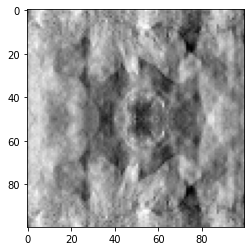

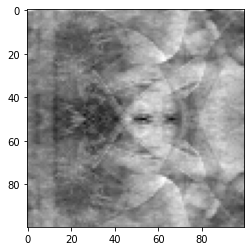

In [12]:
from matplotlib import pyplot as plt
def original(img):
    row=[]
    col=[]
    m,n=img.shape
    result = np.array(img)
    for p in result:
        row.append(find_idft(p))
    result2 = np.array(row)
    for p in result2.T:
        col.append(find_idft(p))
    result3 = np.array(col)
    return (result3.T/(m*n))

# arr = np.array(arr)
# print(original(arr))
orig_img_dog = original(lena_mag_dog_phase)
orig_img_lena = original(dog_mag_lena_phase)
print("idft image:  ",(orig_img_lena))
plt.imshow(orig_img_dog,cmap='gray')
plt.show()
plt.imshow(orig_img_lena,cmap='gray')
plt.show()
# img2 = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
# resultR = np.array(img2)
# li=[]
# for p in resultR.T:
#         li.append(find_idft(p))
# print(li)